In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [4]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata"

In [5]:
def calc_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Example use
print(calc_distance(1, 1, 1, 1))
print(calc_distance(1, 1, 2, 2))

0.0
1.4142135623730951


In [6]:
data = pd.read_csv(os.path.join(data_path, "QBertData.csv"), index_col=0)
data['trialID'] = range(len(data))
data['reward_bool'] = data['reward'] > 0
data['qbert_snake_distance'] = calc_distance(data['qbert_x'], data['qbert_y'], data['snake_x'], data['snake_y'])
data['cum_reward'] = np.cumsum(data['reward'])
data

,action,reward,game over,qbert_x,qbert_y,qbert_tile,snake_x,snake_y,monster_x,monster_y,trialID,reward_bool,qbert_snake_distance,cum_reward
0,0,0,False,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0,False,0.000000,0
1,0,0,False,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1,False,0.000000,0
2,0,0,False,0.000000,0.000000,0,0.0,0.0,0.0,0.0,2,False,0.000000,0
3,0,0,False,0.000000,0.000000,0,0.0,0.0,0.0,0.0,3,False,0.000000,0
4,3,0,False,0.000000,0.000000,0,0.0,0.0,0.0,0.0,4,False,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0,0,False,95.050000,169.700000,19,0.0,0.0,0.0,0.0,503,False,194.506022,450
504,0,0,False,100.000000,165.932432,0,0.0,0.0,0.0,0.0,504,False,193.735831,450
505,0,0,False,105.000000,170.932432,0,0.0,0.0,0.0,0.0,505,False,200.606322,450
506,0,0,False,105.108108,180.878378,0,66.0,44.0,0.0,0.0,506,False,142.355662,450


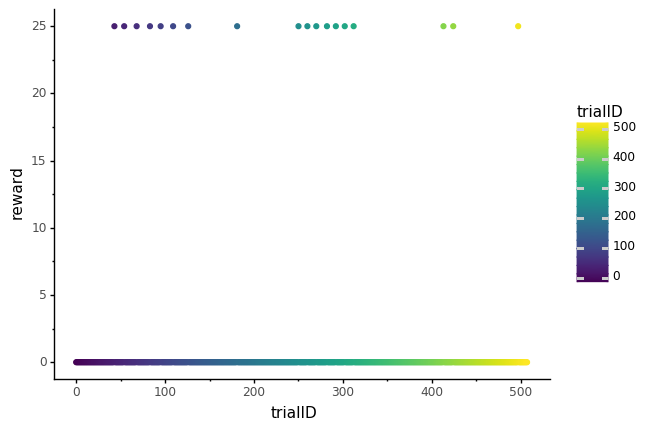

<ggplot: (121966438166)>

In [7]:
g = (gg.ggplot(data, gg.aes('trialID', 'reward', color='trialID'))
 + gg.geom_point()
)
g

In [8]:
# np.unique(data.loc[data.qbert_snake_distance == 0,  'trialID'])
print(np.unique(data.loc[data.qbert_x == 0,  'trialID']))
# print(np.unique(data.loc[data.snake_x == 0,  'trialID']))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362]


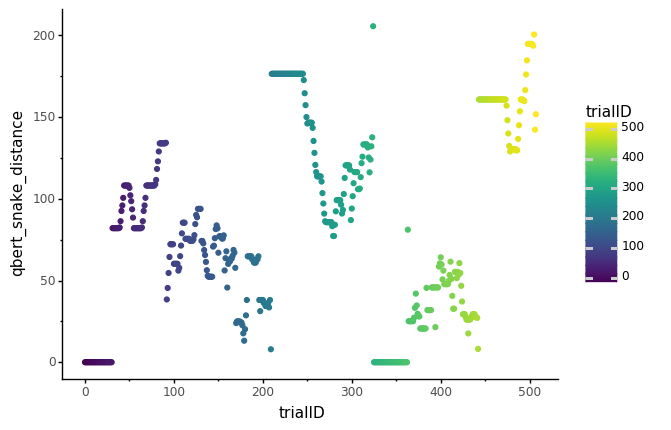

<ggplot: (-9223371885065046051)>

In [92]:
g + gg.aes(y='qbert_snake_distance')

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\scales\scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


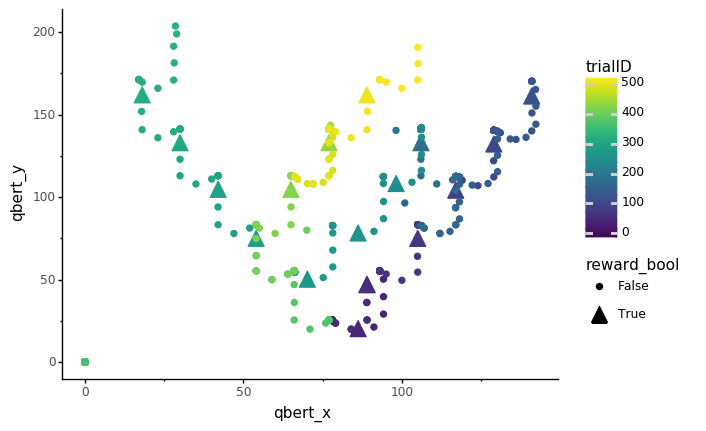

<ggplot: (151789079528)>

In [99]:
g + gg.aes(x='qbert_x', y='qbert_y', size='reward_bool', shape='reward_bool')

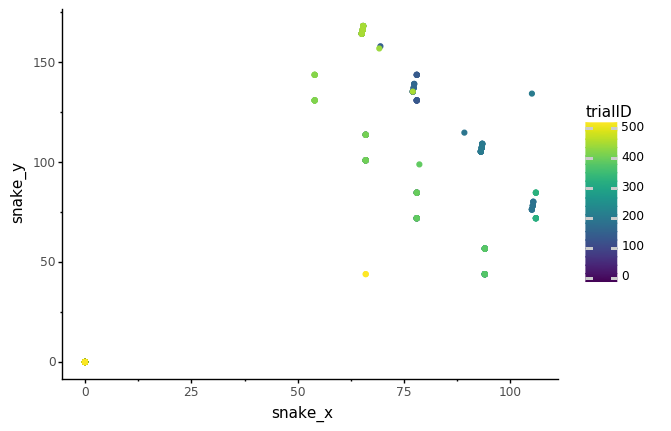

<ggplot: (151787507944)>

In [100]:
g + gg.aes(x='snake_x', y='snake_y')

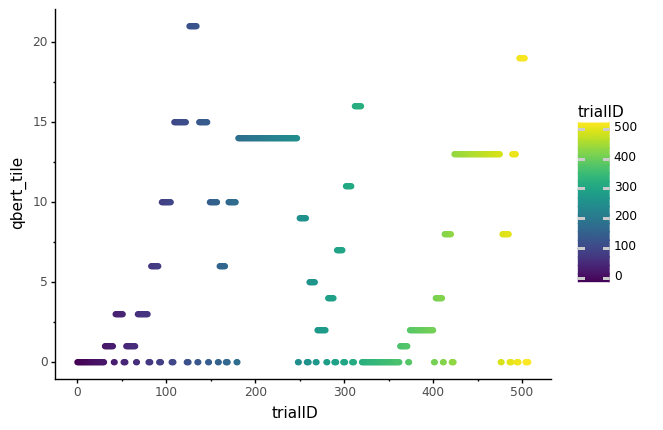

<ggplot: (151787554224)>

In [101]:
g + gg.aes(y='qbert_tile')

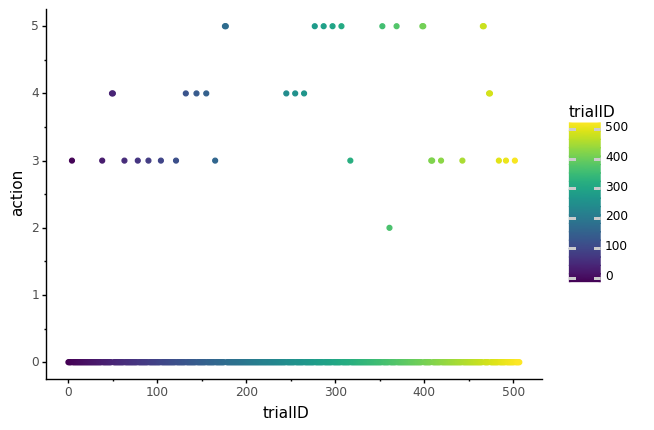

<ggplot: (151789036394)>

In [102]:
g + gg.aes(y='action')

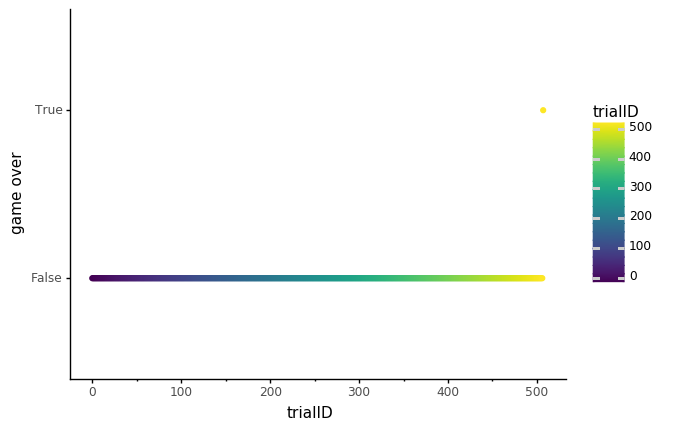

<ggplot: (-9223371885067283298)>

In [103]:
g + gg.aes(y='game over')

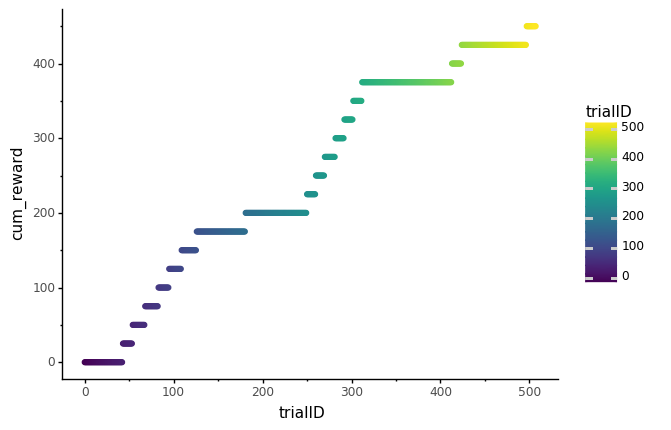

<ggplot: (151789193350)>

In [104]:
g + gg.aes(y='cum_reward')